## Tutorial 1. Network Science: difussion of microfinance at rural villages in India 

Created by Emanuel Flores-Bautista 2018.  All code contained in this notebook is licensed under the [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/).

This tutorial was extracted from the HarvardX Course Python for Research. You can find the course [here](https://www.edx.org/es/course/using-python-research-harvardx-ph526x-0). This tutorial uses the data from **A. Banerjee _et al._** (2013)The Diffusion of Microfinance. *Science* 26 Jul 2013: Vol. 341, Issue 6144, 1236498 [DOI: 10.1126/science.1236498](http://science.sciencemag.org/content/341/6144/1236498.long) You can download the paper [here](https://economics.mit.edu/files/7781).

In [1]:
##This Python Magic command allows graphs to be plotted in the notebook
%matplotlib inline
##This command sets the graphs format to svg
%config InlineBackend.figure_format = 'svg'

import numpy as np
import networkx as nx
import seaborn as sns 
import matplotlib.pyplot as plt
import TCD19_utils as TCD

TCD.set_plotting_style_2()

First, let's practice some NetworkX and look at the Erdos-Renyi graph.

In [2]:
net = nx.erdos_renyi_graph(150, 0.1)


In [3]:
type(net)

networkx.classes.graph.Graph

Let's visualize our network.

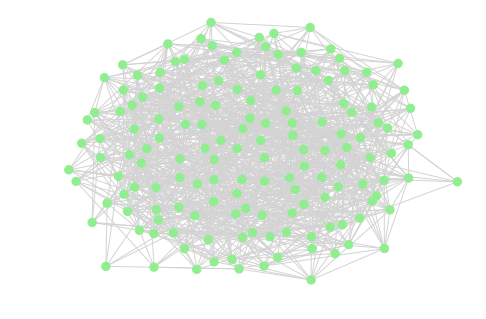

In [4]:
nx.draw_kamada_kawai(net, edge_color='lightgrey', node_color= 'lightgreen',
        line_color = 'black', edge_size = 200, node_size = 70)

The network degrees (or edges of each node) are stored in the `net.degree()` method.

In [5]:
net.degree()

DegreeView({0: 11, 1: 12, 2: 11, 3: 15, 4: 16, 5: 12, 6: 11, 7: 20, 8: 11, 9: 17, 10: 18, 11: 14, 12: 16, 13: 11, 14: 10, 15: 16, 16: 15, 17: 11, 18: 12, 19: 15, 20: 17, 21: 19, 22: 20, 23: 13, 24: 10, 25: 22, 26: 13, 27: 10, 28: 17, 29: 11, 30: 9, 31: 13, 32: 14, 33: 14, 34: 14, 35: 11, 36: 19, 37: 18, 38: 15, 39: 21, 40: 10, 41: 17, 42: 10, 43: 20, 44: 13, 45: 13, 46: 14, 47: 16, 48: 14, 49: 18, 50: 12, 51: 13, 52: 16, 53: 16, 54: 12, 55: 6, 56: 15, 57: 12, 58: 23, 59: 18, 60: 7, 61: 16, 62: 9, 63: 18, 64: 8, 65: 12, 66: 17, 67: 15, 68: 12, 69: 12, 70: 17, 71: 9, 72: 13, 73: 14, 74: 9, 75: 15, 76: 15, 77: 15, 78: 20, 79: 26, 80: 24, 81: 14, 82: 21, 83: 8, 84: 10, 85: 14, 86: 16, 87: 14, 88: 12, 89: 16, 90: 13, 91: 18, 92: 15, 93: 17, 94: 15, 95: 19, 96: 18, 97: 20, 98: 25, 99: 13, 100: 13, 101: 12, 102: 17, 103: 16, 104: 21, 105: 16, 106: 15, 107: 15, 108: 21, 109: 15, 110: 10, 111: 12, 112: 21, 113: 21, 114: 15, 115: 18, 116: 13, 117: 14, 118: 29, 119: 16, 120: 12, 121: 18, 122: 16,

In [6]:
type(net.degree())

networkx.classes.reportviews.DegreeView

We can see that it is a dictionary, so let's extract its values. Now we can plot a histogram of the degree distribution.

In [7]:
x= [] ## list storing degree distribution 

for i in list(net.degree()):
    x.append(i[1])


Text(0,0.5,'PDF')

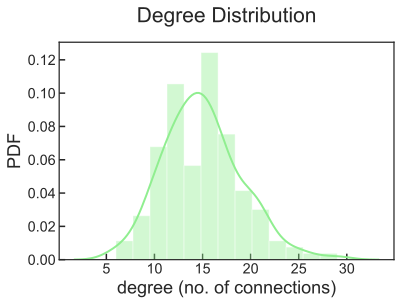

In [8]:
ax = sns.distplot(x,color= 'lightgreen')
ax.set_title('Degree Distribution')
ax.set_xlabel('degree (no. of connections)')
ax.set_ylabel('PDF')

We can see that the distribituion $\sim$N ($\mu$ = $np$, $\sigma^2$)

How would you do it using Matplotlib? find out and write the code.

In [9]:
##Write your code here 

### Small world networks: Barabási & Albert Model.

The Barabási Albert model is called by the preferential attachment

https://youtu.be/prjl7wYvX4g

In [10]:

n_nodes = 1000
m = 4 # number of edges to attach from

net = nx.barabasi_albert_graph(n_nodes, m) 

''

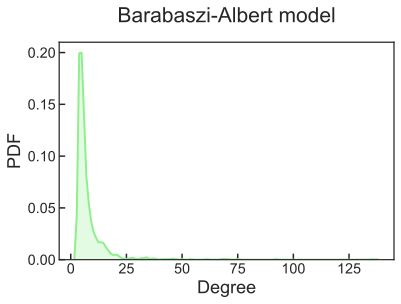

In [11]:
x= [] ## list storing degree distribution 

for i in list(net.degree()):
    x.append(i[1])

sns.kdeplot(x,color= 'lightgreen', shade = True)
plt.title('Barabaszi-Albert model', fontsize= 21)
plt.xlabel('Degree')
plt.ylabel('PDF');

## Analysis on the microfinance network.

Okay, let's start loading the adjacenct matrices corresponding to two villages. 

In [12]:
pwd

'/Users/manoloflores/jupyter-notebooks/TCD_19/notebooks'

In [13]:
##Upload the adjacency matrixes

A1= np.loadtxt("../data/adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2= np.loadtxt("../data/adj_allVillageRelationships_vilno_2.csv", delimiter=",")

`nx.to_networkx_() method`

In [14]:
## convert the adjacency matrixes into graphs in one step
G1= nx.to_networkx_graph(A1)
G2= nx.to_networkx_graph(A2)

Let's compute the clustering coefficient. 

In [41]:
def net_stats(G):
    
    net_degree_distribution= []

    for i in list(G.degree()):
        net_degree_distribution.append(i[1])
        
    print("Number of nodes in the network: %d" %G.number_of_nodes())
    print("Number of edges in the network: %d" %G.number_of_edges())
    print("Avg node degree: %.2f" %np.mean(list(net_degree_distribution)))
    print('Avg clustering coefficient: %.2f'%nx.cluster.average_clustering(G))
    print('Network density: %.2f'%nx.density(G))

    
    fig, axes = plt.subplots(1,2, figsize=(10,4))
    
    axes[0].hist(list(net_degree_distribution), bins=20, color = 'lightgreen')
    axes[0].set_xlabel("Degree $k$")
    #axes[0].set_ylabel("$P(k)$")
    
    axes[1].hist(list(nx.clustering(G).values()), bins= 20, color = 'lightgrey')
    axes[1].set_xlabel("Clustering Coefficient $C$")
    #axes[1].set_ylabel("$P(k)$")
    axes[1].set_xlim([0,1])
          

Number of nodes in the network: 843
Number of edges in the network: 3405
Avg node degree: 8.08
Avg clustering coefficient: 0.64
Network density: 0.01


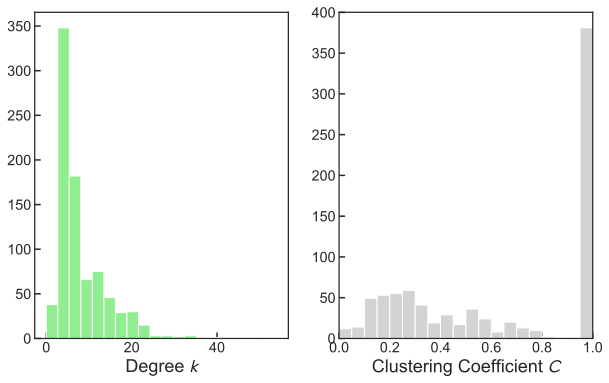

In [42]:
net_stats(G1)

Number of nodes in the network: 877
Number of edges in the network: 3063
Avg node degree: 6.99
Avg clustering coefficient: 0.65
Network density: 0.01


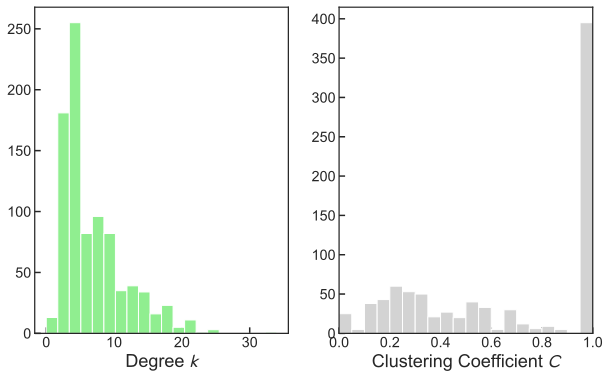

In [43]:
net_stats(G2)

We can see that our networks look like free-scale networks. Therefore there will be hubs in the network.

## Largest Conected Component (LCC)

Q: How large is the largest connected component in our graph? 

The `nx.connected_component_subgraphs()`method is a generator function.

In [18]:
gen= nx.connected_component_subgraphs(G1) 

## calling the actual component by next method

g= gen.__next__()

type(g)


networkx.classes.graph.Graph

We can ask the size of the network using the `len()` function.

In [19]:
len(g)

825

However if we calling the `next()`method, we will be generating the second to largest connected component, and so on.

In [20]:
g = gen.__next__()

In [21]:
len(g)

3

We can extract the more neatly LCC calling the `max()` function. And using the length `len` on the `key` argument.

In [22]:
g1_lcc= max(nx.connected_component_subgraphs(G1), key=len)

g2_lcc= max(nx.connected_component_subgraphs(G2), key=len)

g1_lcc


We can estimate the proportion of the LCC with respect to the original graph.

In [23]:
## proportion of the LCC with its graph
len(g2_lcc)/ len(G2)

0.9236031927023945

In [24]:
len(g1_lcc)/ len(G1)

0.9786476868327402

Just to practice, let's explore the eigenvector centrality in NetworkX. We'll go back to other centrality measures in the following lectures.

In [28]:
ec= nx.eigenvector_centrality(G1)
eigen_centrality = sorted(ec.items(), key= lambda ec: ec[1], reverse= True)[:10]
eigen_centrality

[(794, 0.2398053405827309),
 (353, 0.23319392464734826),
 (542, 0.18416512938503532),
 (476, 0.16973377215845054),
 (748, 0.1594744234972607),
 (739, 0.15313710893967497),
 (161, 0.15288795870283786),
 (400, 0.15145698349544187),
 (741, 0.14431246025449798),
 (480, 0.1383957721376014)]

We see that we get the same hubs using different metrics. 

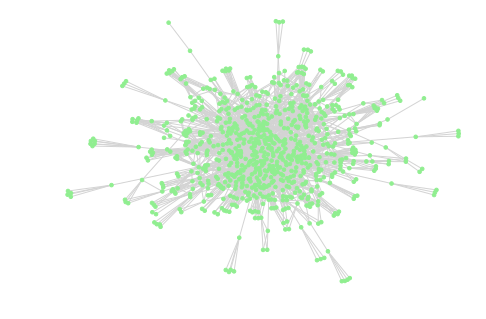

In [34]:
plt.figure()
nx.draw(g1_lcc, edge_color='lightgrey', node_color= 'lightgreen', node_size=13);